# Импортируем библиотеки

In [216]:
import requests  # Библиотека для получения данных со сайтов
from bs4 import BeautifulSoup  # Библиотека для работы с полученной HTML-страницей
import pandas as pd  # Библиотека для работы с датафрейем
import time  # Библиотека для управленем временными параметрами
from pprint import pprint  # Библиотека для удобного отображения данных
import numpy as np  # Библиотека для удобного математического вычисления
import matplotlib.pyplot as plt  # Библиотека для визуализации данных
import seaborn as sns  # Библиотека для визуализации данных
import warnings
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,StackingRegressor
import random
warnings.filterwarnings("ignore")
%matplotlib inline

__Для парсинга данных сайтов для покупки автомобилев был сделан выбор в сторону сайтов:__
1. DROM.ru
2. auto.ru

__Вывод: Анализ был сделан в сторону сайта auto.ru,т.к в результате анализа на много большого кол-ва признаков,предсказательная способность вырастит в разы у модели.Нежели у первого варинта.__

# Извлечение ссылок с сайта auto.ru

__В дальнейшем будет создана функция в которой будет собрана огромная база данных в один датафрейм:__

In [2]:
url = 'https://auto.drom.ru/all'
response = requests.get(url)
time.sleep(10)
response.status_code  # Хороший показатель получения данных 200

200

__Извлеченный HTML-код с одной страницы:__

In [3]:
pprint(response.text)

('<!DOCTYPE html>\n'
 '<html\n'
 '    xmlns="http://www.w3.org/1999/xhtml"\n'
 '    lang="ru"\n'
 '    xml:lang="ru"\n'
 '    class="drom-notouch no-js no-main0"\n'
 '>\n'
 '<head>\n'
 '                    <title>Продажа автомобилей в России. Подержанные авто, '
 'новые. Купить автомобиль б/у, цены.</title>\n'
 '        \n'
 '                <meta http-equiv="X-UA-Compatible" content="IE=Edge"/>\n'
 '\n'
 "        <meta name='copyright' content='drom.ru' />\n"
 "<meta name='format-detection' content='telephone=no' />\n"
 "<meta name='theme-color' content='#000000' />\n"
 "<meta http-equiv='Content-Type' content='text/html; charset=windows-1251' "
 '/>\n'
 "<meta charset='windows-1251' />\n"
 "<meta name='candy.config' "
 "content='{&quot;cf&quot;:{&quot;p&quot;:{&quot;min&quot;:&quot;200000&quot;,&quot;max&quot;:&quot;5399000&quot;},&quot;y&quot;:{&quot;min&quot;:&quot;1994&quot;,&quot;max&quot;:&quot;2022&quot;},&quot;v&quot;:{&quot;min&quot;:&quot;1400&quot;,&quot;max&quot;:&quot;570

 'e162wx9x0"><div class="css-1x4jcds eotelyr0"><span data-ftid="bull_location" '
 'class="css-1mj3yjd e162wx9x0">Нижний Тагил</span><div '
 'data-ftid="bull_date">сегодня</div></div></div><div class="css-zfnubw '
 'ecjvn7j0"><div class="css-2rb5ei"><svg width="30" height="30" viewBox="0 0 '
 '30 30" fill="none" xmlns="http://www.w3.org/2000/svg"><path '
 'd="M13.606.973a1.485 1.485 0 0 1 2.788 0l3.043 7.653c.217.547.709.92 '
 '1.273.968l7.9.662c1.337.112 1.88 1.86.86 2.773l-6.018 '
 '5.393c-.43.385-.618.989-.486 1.565l1.838 8.063c.312 1.366-1.109 2.446-2.255 '
 '1.714l-6.762-4.321a1.453 1.453 0 0 0-1.574 0l-6.763 '
 '4.32c-1.145.733-2.566-.347-2.255-1.713l1.84-8.063a1.623 1.623 0 0 '
 '0-.487-1.565L.53 13.029c-1.02-.914-.477-2.66.86-2.773l7.9-.662a1.517 1.517 0 '
 '0 0 1.273-.968L13.606.973Z" '
 'fill="currentColor"></path></svg></div></div></div></a><style '
 'data-emotion="css '
 '5l5vh6">.css-5l5vh6{padding-top:40px;padding-bottom:40px;border-top:1px '
 'solid hsl(215, 27%, 91%);}</

 'Octavia, '
 '2001"},{"@type":"Offer","price":265000,"priceCurrency":"RUB","availability":"https:\\/\\/schema.org\\/","url":"https:\\/\\/ekaterinburg.drom.ru\\/ford\\/c-max\\/46254856.html","priceValidUntil":"2022-04-12","name":"Ford '
 'C-MAX, '
 '2006"},{"@type":"Offer","price":1595000,"priceCurrency":"RUB","availability":"https:\\/\\/schema.org\\/","url":"https:\\/\\/ekaterinburg.drom.ru\\/jeep\\/grand_cherokee\\/46096430.html","priceValidUntil":"2022-03-28","name":"Jeep '
 'Grand Cherokee, '
 '2012"},{"@type":"Offer","price":265000,"priceCurrency":"RUB","availability":"https:\\/\\/schema.org\\/","url":"https:\\/\\/sredneuralsk.drom.ru\\/lada\\/2121_4x4_niva\\/46042112.html","priceValidUntil":"2022-03-23","name":"Лада '
 '4x4 2121 Нива, '
 '2006"},{"@type":"Offer","price":245000,"priceCurrency":"RUB","availability":"https:\\/\\/schema.org\\/","url":"https:\\/\\/ekaterinburg.drom.ru\\/daewoo\\/nexia\\/46232616.html","priceValidUntil":"2022-04-10","name":"Daewoo '
 'Nexia, '
 '2013"}

 '0-1.221.819.819 0 0 0-1.184 0L5 3.937 1.429.253z" '
 'fill="currentColor"></path></svg>\n'
 '            </span>\n'
 '        </div>\n'
 '        <div data-sitemap-container class="footer-sitemap__links flex '
 'flex_align_between" style="display:none;">\n'
 '                            <div class="footer-sitemap__links-column" '
 'style="order: 2"\n'
 '                >\n'
 '                                            <div>\n'
 '                            <a '
 'href="https://www.drom.ru/sitemap/html/sales_firm_model_1.html" '
 'class="footer-sitemap__link">\n'
 '                                Модели авто: '
 '&lt;A&gt;-&lt;B&gt;                            </a>\n'
 '                        </div>\n'
 '                                            <div>\n'
 '                            <a '
 'href="https://www.drom.ru/sitemap/html/sales_firm_model_2.html" '
 'class="footer-sitemap__link">\n'
 '                                Модели авто: '
 '&lt;C&gt;-&lt;D&gt;                       

__Извлечения с кода HTML ссылку на страницу с данными об автомобиле:__

In [4]:
page = BeautifulSoup(response.text)
block = page.find_all(class_='css-1173kvb eaczv700')
block[0]

<div class="css-1173kvb eaczv700"><div class="css-1173kvb eaczv700"><style data-emotion="css fzodm3">.css-fzodm3{position:relative;margin-bottom:20px;}</style><div class="css-fzodm3 ecmc0a90"><style data-emotion="css 1o6tcsu">.css-1o6tcsu{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-box-pack:justify;-webkit-justify-content:space-between;justify-content:space-between;}</style><div class="css-1o6tcsu e1lm3vns0"><div><style data-emotion="css 11n644p">.css-11n644p{margin-right:10px;}@media (min-width: 1280px){.css-11n644p{margin-right:30px;}}.drom-mobile .css-11n644p{margin-left:15px;margin-right:0;}</style><span class="css-11n644p esnoz720">Сортировка</span><style data-emotion="css 9ec8gp">.css-9ec8gp{-webkit-text-decoration:none;text-decoration:none;cursor:pointer;color:hsl(209, 77%, 45%);border-bottom:none;display:inline-block;padding:0 10px;position:relative;line-height:30px;}.css-9ec8gp .eakkndi0{border-bottom:1px solid transparent;}.drom-notouch .

In [5]:
href = [hrefs['href'] for hrefs in block[0].find_all('a', href=True)]
auto = href[7:27]
auto

['https://ekaterinburg.drom.ru/honda/stepwgn/46260419.html',
 'https://ekaterinburg.drom.ru/toyota/rav4/46259534.html',
 'https://ekaterinburg.drom.ru/lexus/lx570/45268474.html',
 'https://ekaterinburg.drom.ru/lada/2121_4x4_niva/46257763.html',
 'https://nizhniy-tagil.drom.ru/peugeot/408/46254962.html',
 'https://ekaterinburg.drom.ru/hyundai/getz/45591767.html',
 'https://ekaterinburg.drom.ru/skoda/octavia/45998216.html',
 'https://ekaterinburg.drom.ru/ford/c-max/46254856.html',
 'https://ekaterinburg.drom.ru/jeep/grand_cherokee/46096430.html',
 'https://sredneuralsk.drom.ru/lada/2121_4x4_niva/46042112.html',
 'https://ekaterinburg.drom.ru/daewoo/nexia/46232616.html',
 'https://kamensk-uralskiy.drom.ru/subaru/impreza/46081636.html',
 'https://ekaterinburg.drom.ru/volkswagen/tiguan/46187974.html',
 'https://ekaterinburg.drom.ru/hyundai/solaris/46225616.html',
 'https://ekaterinburg.drom.ru/honda/hr-v/45861079.html',
 'https://ekaterinburg.drom.ru/audi/q5/46245971.html',
 'https://ekater

__Кол-во ссылок по информации про автомобили на одну страницу:__

In [6]:
print('Кол-во ссылок:', len(auto))

Кол-во ссылок: 20


__Создадим огромное кол-во ссылок в одном списке:__

__Скачиваем огромное кол-во ссылок и помещаем в один список:__

In [7]:
pages = []
for page in range(1, 101):
    if page == 1:
        url = 'https://auto.drom.ru/all/'
        response = requests.get(url)
        time.sleep(10)
        pagehtml = BeautifulSoup(response.text)
        block = pagehtml.find_all(class_='css-1173kvb eaczv700')
        href = [hrefs['href'] for hrefs in block[0].find_all('a', href=True)]
        auto = href[7:27]
        pages.append(auto)
    if page != 1:
        url = 'https://auto.drom.ru/all/'+'page'+str(page)+'/'
        response = requests.get(url)
        time.sleep(10)
        pagehtml = BeautifulSoup(response.text)
        block = pagehtml.find_all(class_='css-1173kvb eaczv700')
        href = [hrefs['href'] for hrefs in block[0].find_all('a', href=True)]
        auto = href[7:27]
        pages.append(auto)
    print('Скачиваем ссылки со сайта:', str(int((page/100)*100)), '%')

Скачиваем ссылки со сайта: 1 %
Скачиваем ссылки со сайта: 2 %
Скачиваем ссылки со сайта: 3 %
Скачиваем ссылки со сайта: 4 %
Скачиваем ссылки со сайта: 5 %
Скачиваем ссылки со сайта: 6 %
Скачиваем ссылки со сайта: 7 %
Скачиваем ссылки со сайта: 8 %
Скачиваем ссылки со сайта: 9 %
Скачиваем ссылки со сайта: 10 %
Скачиваем ссылки со сайта: 11 %
Скачиваем ссылки со сайта: 12 %
Скачиваем ссылки со сайта: 13 %
Скачиваем ссылки со сайта: 14 %
Скачиваем ссылки со сайта: 15 %
Скачиваем ссылки со сайта: 16 %
Скачиваем ссылки со сайта: 17 %
Скачиваем ссылки со сайта: 18 %
Скачиваем ссылки со сайта: 19 %
Скачиваем ссылки со сайта: 20 %
Скачиваем ссылки со сайта: 21 %
Скачиваем ссылки со сайта: 22 %
Скачиваем ссылки со сайта: 23 %
Скачиваем ссылки со сайта: 24 %
Скачиваем ссылки со сайта: 25 %
Скачиваем ссылки со сайта: 26 %
Скачиваем ссылки со сайта: 27 %
Скачиваем ссылки со сайта: 28 %
Скачиваем ссылки со сайта: 28 %
Скачиваем ссылки со сайта: 30 %
Скачиваем ссылки со сайта: 31 %
Скачиваем ссылки 

__Получился списов в списке,но лучше все соединить в один список для дальнейшего помещения ДФ:__

In [8]:
refs_html = []
i = 0
for i in range(100):
    for i_2 in range(20):
        refs_html.append(pages[i][i_2])

__Сумарно должно получится было 2000 ссылок(20 ссылок на одной страницы и 100 страниц HTML):__

In [9]:
print('Кол-во полученых ссылок:', len(refs_html))

Кол-во полученых ссылок: 2000


__Помещаем все это в один датафрейм воизбежания ошибок при возможном изменения HTML странице на сайте:__

In [10]:
df = pd.DataFrame({'Кол-во ссылок': refs_html})
df

,Кол-во ссылок
0,https://ekaterinburg.drom.ru/honda/stepwgn/462...
1,https://ekaterinburg.drom.ru/toyota/rav4/46259...
2,https://ekaterinburg.drom.ru/lexus/lx570/45268...
3,https://ekaterinburg.drom.ru/lada/2121_4x4_niv...
4,https://nizhniy-tagil.drom.ru/peugeot/408/4625...
...,...
1995,https://nizhnevartovsk.drom.ru/kia/cee~d/45493...
1996,https://cheboksary.drom.ru/hyundai/grand_stare...
1997,https://orenburg.drom.ru/toyota/rav4/45495916....
1998,https://surgut.drom.ru/kia/sorento/45876656.html


__Создаем csv файл:__

In [11]:
df.to_csv('HTML-pages.csv')

__Загружаем полученный датафрейм:__

In [2]:
df = pd.read_csv('HTML-pages.csv')

__Способ с сохранением все в еднинный файл очень удобный в том плане,что помогает избежать дальнейшего измениения HTML-кода,что влекло к поломке извлеченной информации.Из минусов можно отметить,то что данные не будут обновляться.__

# Помещаем признаки про машины в один датафрейм

In [13]:
refs = list(df['Кол-во ссылок'])
refs

['https://ekaterinburg.drom.ru/honda/stepwgn/46260419.html',
 'https://ekaterinburg.drom.ru/toyota/rav4/46259534.html',
 'https://ekaterinburg.drom.ru/lexus/lx570/45268474.html',
 'https://ekaterinburg.drom.ru/lada/2121_4x4_niva/46257763.html',
 'https://nizhniy-tagil.drom.ru/peugeot/408/46254962.html',
 'https://ekaterinburg.drom.ru/hyundai/getz/45591767.html',
 'https://ekaterinburg.drom.ru/skoda/octavia/45998216.html',
 'https://ekaterinburg.drom.ru/ford/c-max/46254856.html',
 'https://ekaterinburg.drom.ru/jeep/grand_cherokee/46096430.html',
 'https://sredneuralsk.drom.ru/lada/2121_4x4_niva/46042112.html',
 'https://ekaterinburg.drom.ru/daewoo/nexia/46232616.html',
 'https://kamensk-uralskiy.drom.ru/subaru/impreza/46081636.html',
 'https://ekaterinburg.drom.ru/volkswagen/tiguan/46187974.html',
 'https://ekaterinburg.drom.ru/hyundai/solaris/46225616.html',
 'https://ekaterinburg.drom.ru/honda/hr-v/45861079.html',
 'https://ekaterinburg.drom.ru/audi/q5/46245971.html',
 'https://ekater

## Поработаем пока с одной HTML-странице:

__Извлекаю информацию характеристик по HTML одной странице:__

In [14]:
url = refs[0]
response = requests.get(url)
time.sleep(10)
response.status_code

200

In [15]:
page = BeautifulSoup(response.text)
pprint(page)

<!DOCTYPE html>
<html class="drom-notouch no-js no-main0" lang="ru" xml:lang="ru" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>Honda Stepwgn 1998 года в Екатеринбурге, Запрет на регистрацию, документы все, без документов, с пробегом, правый руль, автоматическая коробка передач, бензин</title>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="drom.ru" name="copyright"/>
<meta content="#000000" name="theme-color"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta charset="utf-8"/>
<meta content='{"cf":{"m":291,"f":2,"p":200000,"y":1998,"is_nodocs":1,"d":0,"b":["6"],"r":"66","c":43,"v":2000,"ft":["1"],"fe":{"unsold":1,"w":1,"bezpr":0,"gtcars":0,"new":0},"category_id":1,"section_id":258},"cn":{"autoCityVtb702":"766","sberbank1049":"1,972","autoCity7039":"1,102","rgsFinclub":"3,560","rusfinanceFinclub":"3,373","autoCity109":"2,169","uralSib":"1,504","plusBankNew":"2,827","":"7,421","primSocbank4095":"1,961"},"geor":66,"geoc":9,"id":27,"b"

In [16]:
block = page.find_all('tr')
price = page.find(class_='css-10qq2x7 e162wx9x0').text[:-1]
characteristics = [chara.text for chara in block]
characteristics

['Двигательбензин, 2.0 л',
 'Мощность125\xa0л.с.,\xa0налог',
 '',
 'Коробка передачАКПП',
 'Приводпередний',
 'Цветсерый',
 'Пробег, км111\xa0111',
 'Рульправый',
 'Особые отметкидокументы с проблемами, запрет на регистрацию',
 'Поколение1 поколение']

In [17]:
columns = [col for col in characteristics if col != '']
columns

['Двигательбензин, 2.0 л',
 'Мощность125\xa0л.с.,\xa0налог',
 'Коробка передачАКПП',
 'Приводпередний',
 'Цветсерый',
 'Пробег, км111\xa0111',
 'Рульправый',
 'Особые отметкидокументы с проблемами, запрет на регистрацию',
 'Поколение1 поколение']

In [81]:
motor = columns[0][:-13]
power = columns[1][:-15]
transmission = columns[2][:-4]
drive = columns[3][:-8]
color = columns[4][:-5]
mileage = columns[5][:-7]
wheel = columns[6][:-6]

In [82]:
name_car = page.find_all(class_='css-ik080n e162wx9x0')[0].text

__Созданный датафрем для характеристик одного автомобиля:__

In [83]:
df_2 = pd.DataFrame({'Название автомобиля': [name_car],
                     str(motor+'/л'): [columns[0][-5:-2]],
                     str(power+'/л.с'): [columns[1][-15:-12]],
                     transmission: [columns[2][-4:]],
                    drive: [columns[3][-8:]],
                     color: [columns[4][-5:]],
                     mileage: [columns[5][-6:]],
                     wheel: [columns[6][-6:]],
                     'Стоимость/руб.': [price]})
df_2

,Название автомобиля,Двигатель/л,Мощность/л.с,Коробка передач,Привод,Цвет,"Пробег, км",Руль,Стоимость/руб.
0,"Продажа Honda Stepwgn, 1998 год в Екатеринбурге",2.0,125,АКПП,передний,серый,11 111,правый,200 000


## Подготавливаем полноценную БД:

In [139]:
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
col8 = []
col9 = []
suma = 1
for ref in refs:
    response = requests.get(ref)
    time.sleep(0.5)
    if response.status_code == 200:
        page = BeautifulSoup(response.text)
        block = page.find_all('tr')
        characteristics = [chara.text for chara in block]
        columns = [col for col in characteristics if col != '']
        name_car = page.find_all(class_='css-ik080n e162wx9x0')[0].text
        price = page.find(class_='css-10qq2x7 e162wx9x0').text[:-1]
        col1.append(name_car)
        col2.append(columns[0][-5:-2])
        col3.append(columns[1][-15:-12])
        col4.append(columns[2][-4:])
        col5.append(columns[3][-8:])
        col6.append(columns[4][-5:])
        col7.append(columns[5][-6:])
        col8.append(columns[6][-6:])
        col9.append(price)
        if name_car == np.nan:
            col1.append(np.nan)
        if columns[0] == np.nan:
            col2.append(np.nan)
        if columns[1] == np.nan:
            col3.append(np.nan)
        if columns[2] == np.nan:
            col4.append(np.nan)
        if columns[3] == np.nan:
            col5.append(np.nan)
        if columns[4] == np.nan:
            col6.append(np.nan)
        if columns[5] == np.nan:
            col7.append(np.nan)
        if columns[6] == np.nan:
            col8.append(np.nan)
        if price == np.nan:
            col9.append(np.nan)
        if round((suma/len(refs_html))*100, 2) == 9.4:
            break
    print(len(col1), len(col2), len(col3), len(col4), len(
        col5), len(col6), len(col7), len(col8), len(col9))
    print('Датафрейм готов на', str(round((suma/len(refs_html))*100, 2)), '%')
    suma += 1

1 1 1 1 1 1 1 1 1
Датафрейм готов на 0.05 %
2 2 2 2 2 2 2 2 2
Датафрейм готов на 0.1 %
3 3 3 3 3 3 3 3 3
Датафрейм готов на 0.15 %
4 4 4 4 4 4 4 4 4
Датафрейм готов на 0.2 %
5 5 5 5 5 5 5 5 5
Датафрейм готов на 0.25 %
6 6 6 6 6 6 6 6 6
Датафрейм готов на 0.3 %
7 7 7 7 7 7 7 7 7
Датафрейм готов на 0.35 %
8 8 8 8 8 8 8 8 8
Датафрейм готов на 0.4 %
9 9 9 9 9 9 9 9 9
Датафрейм готов на 0.45 %
10 10 10 10 10 10 10 10 10
Датафрейм готов на 0.5 %
11 11 11 11 11 11 11 11 11
Датафрейм готов на 0.55 %
12 12 12 12 12 12 12 12 12
Датафрейм готов на 0.6 %
13 13 13 13 13 13 13 13 13
Датафрейм готов на 0.65 %
14 14 14 14 14 14 14 14 14
Датафрейм готов на 0.7 %
15 15 15 15 15 15 15 15 15
Датафрейм готов на 0.75 %
16 16 16 16 16 16 16 16 16
Датафрейм готов на 0.8 %
17 17 17 17 17 17 17 17 17
Датафрейм готов на 0.85 %
18 18 18 18 18 18 18 18 18
Датафрейм готов на 0.9 %
19 19 19 19 19 19 19 19 19
Датафрейм готов на 0.95 %
20 20 20 20 20 20 20 20 20
Датафрейм готов на 1.0 %
21 21 21 21 21 21 21 21 21
Дата

149 149 149 149 149 149 149 149 149
Датафрейм готов на 7.55 %
150 150 150 150 150 150 150 150 150
Датафрейм готов на 7.6 %
151 151 151 151 151 151 151 151 151
Датафрейм готов на 7.65 %
151 151 151 151 151 151 151 151 151
Датафрейм готов на 7.7 %
152 152 152 152 152 152 152 152 152
Датафрейм готов на 7.75 %
153 153 153 153 153 153 153 153 153
Датафрейм готов на 7.8 %
154 154 154 154 154 154 154 154 154
Датафрейм готов на 7.85 %
155 155 155 155 155 155 155 155 155
Датафрейм готов на 7.9 %
156 156 156 156 156 156 156 156 156
Датафрейм готов на 7.95 %
157 157 157 157 157 157 157 157 157
Датафрейм готов на 8.0 %
158 158 158 158 158 158 158 158 158
Датафрейм готов на 8.05 %
159 159 159 159 159 159 159 159 159
Датафрейм готов на 8.1 %
160 160 160 160 160 160 160 160 160
Датафрейм готов на 8.15 %
161 161 161 161 161 161 161 161 161
Датафрейм готов на 8.2 %
162 162 162 162 162 162 162 162 162
Датафрейм готов на 8.25 %
163 163 163 163 163 163 163 163 163
Датафрейм готов на 8.3 %
164 164 164 164 

__Готовая база данных(В датасете было взято 9.4%):__

In [3]:
df_2 = pd.DataFrame({'Название автомобиля': col1,
                     'Двигатель/л': col2,
                     'Мощность/л.с': col3,
                     'Коробка передач': col4,
                    'Привод': col5,
                     'Цвет': col6,
                     'Пробег, км': col7,
                     'Руль': col8,
                     'Стоимость/руб.': col9})
df_2

NameError: name 'col1' is not defined

__Воизбежание проблем заносим данные в csv формат в связи с возможным изменения HTML-странц в объявления про машин в парсинге и долгой передачи данных(в дальнейшем работа будет с этим датасетом):__

In [153]:
df_2.to_csv('Cars.csv')

In [162]:
df_2 = pd.read_csv('Cars.csv').iloc[:, 1:]
df_2['Название автомобиля'][0] = 'Продажа Honda Stepwgn, 1998 год в Екатеринбурге'
df_2

,Название автомобиля,Двигатель/л,Мощность/л.с,Коробка передач,Привод,Цвет,"Пробег, км",Руль,Стоимость/руб.
0,"Продажа Honda Stepwgn, 1998 год в Екатеринбурге",2.0,125,АКПП,передний,серый,11 111,правый,200 000
1,"Продажа Toyota RAV4, 2008 год в Екатеринбурге",2.0,152,АКПП,ривод4WD,5 дв.,ристый,45 255,1 450 000
2,"Продажа Lexus LX570, 2009 год в Екатеринбурге",", Г",367,АКПП,ривод4WD,ерный,99 000,ьлевый,2 880 000
3,По птс 1994 год! Сел поехал и доехал! Вид бомб...,1.6,ь80,ника,ривод4WD,белый,00 000,ьлевый,220 000
4,"Продажа Peugeot 408, 2015 год в Нижнем Тагиле",1.6,120,АКПП,передний,истый,27 000,ьлевый,700 000
...,...,...,...,...,...,...,...,...,...
180,"Продажа Лада Гранта, 2016 год в Новороссийске",1.6,ь87,ника,передний,седан,тсерый,37 000,430 000
181,"Продажа Honda Mobilio, 2002 год в Уссурийске",1.5,ь90,атор,ривод4WD,серый,30 000,правый,305 000
182,"Продажа Toyota Probox, 2018 год в Уссурийске",1.5,109,атор,передний,синий,по РФ,правый,1 195 000
183,"Продажа Lifan Solano, 2013 год в Омске",1.6,106,атор,передний,истый,21 500,оление,525 000


# Занимаемся обработкой данных

__Занимаемся исправлением некоторых некоректно написанных данных:__

__Обработка данных:__

__Некоректно отображающие данные определяем по сслыкам извлеченных выше и исправляем:__

In [163]:
df_2['Название автомобиля'][3] = 'Продажа Лада 4x4 2121 Нива, 1994 год в Екатеринбурге'
df_2['Название автомобиля'][41] = 'Продажа Opel Vectra, 2006 год в Качканаре'
df_2['Название автомобиля'][7] = 'Продажа Ford C-MAX, 2006 год в Екатеринбурге'
df_2['Название автомобиля'][57] = 'Продажа BMW X7, 2020 год в Екатеринбурге'
df_2['Название автомобиля'][62] = 'Продажа Volvo XC70, 2011 год в Екатеринбурге'
df_2['Название автомобиля'][63] = 'Продажа Kia Picanto, 2007 год в Екатеринбурге'
df_2['Название автомобиля'][66] = 'Продажа Лада Гранта, 2020 год в Екатеринбурге'
df_2['Название автомобиля'][67] = 'Продажа Toyota Highlander, 2020 год в Екатеринбурге'
df_2['Название автомобиля'][126] = 'Продажа Mazda Atenza, 2002 год в Новосибирске'
df_2['Название автомобиля'][127] = 'Продажа Toyota Sprinter Marino, 1993 год в Чите'
df_2['Название автомобиля'].value_counts()

Продажа Toyota Land Cruiser, 2013 год в Краснодаре           2
Продажа Subaru Forester, 2005 год в Новосибирске             2
Продажа Hyundai Solaris, 2018 год в Новосибирске             2
Продажа Hyundai Solaris, 2020 год в Новосибирске             2
Продажа Лада Веста Кросс, 2021 год в Сургуте                 2
                                                            ..
Продажа BMW X6, 2009 год в Екатеринбурге                     1
Продажа Mercedes-Benz GLE Coupe, 2016 год в Нижнем Тагиле    1
Продажа Kia Picanto, 2007 год в Екатеринбурге                1
Продажа Suzuki Grand Vitara, 2011 год в Серове               1
Продажа Toyota Cresta, 2001 год в Усть-Илимске               1
Name: Название автомобиля, Length: 161, dtype: int64

In [164]:
df_2['Двигатель/л'][2] = '5.7'
df_2['Двигатель/л'][48] = '2.0'
df_2['Двигатель/л'][68] = '2.5'
df_2['Двигатель/л'][117] = '1.8'
df_2['Двигатель/л'][118] = '2.4'
df_2['Двигатель/л'][119] = '1.8'
df_2['Двигатель/л'][128] = '2.4'
df_2['Двигатель/л'][145] = '2.0'
df_2['Двигатель/л'][153] = '2.0'
df_2['Двигатель/л'][156] = '3.5'
df_2['Двигатель/л'][158] = '1.6'
df_2['Двигатель/л'][173] = '1.6'
df_2['Двигатель/л'][177] = '1.6'
df_2['Двигатель/л'][116] = '1.5'
df_2['Двигатель/л'].value_counts()

1.6    55
2.0    30
1.5    18
1.8    13
2.5     9
3.0     8
1.4     8
2.4     7
1.3     6
3.5     5
1.7     3
2.3     3
4.0     3
2.7     2
0.7     2
1.2     2
1.0     2
2.2     2
4.7     1
5.7     1
2.8     1
5.0     1
4.4     1
3.6     1
3.7     1
Name: Двигатель/л, dtype: int64

In [165]:
for i in range(185):
    if df_2['Мощность/л.с'][i][0] == 'ь':
        df_2['Мощность/л.с'][i] = df_2['Мощность/л.с'][i][1:]
df_2['Мощность/л.с'].value_counts()

150    15
123    14
105     8
140     5
125     4
       ..
86      1
110     1
81      1
184     1
169     1
Name: Мощность/л.с, Length: 93, dtype: int64

In [166]:
for i in range(185):
    if df_2['Коробка передач'][i] == 'ника':
        df_2['Коробка передач'][i] = 'механика'
    if df_2['Коробка передач'][i] == 'обот':
        df_2['Коробка передач'][i] = 'робот'
    if df_2['Коробка передач'][i] == 'АКПП' or df_2['Коробка передач'][i] == 'омат':
        df_2['Коробка передач'][i] = 'автомат'
    if df_2['Коробка передач'][i] == 'атор':
        df_2['Коробка передач'][i] = 'вариатор'
df_2['Коробка передач'].value_counts()

автомат     96
механика    65
вариатор    20
робот        4
Name: Коробка передач, dtype: int64

In [167]:
for i in range(185):
    if df_2['Привод'][i] == 'ривод4WD':
        df_2['Привод'][i] = '4WD'
    if df_2['Привод'][i] == 'одзадний':
        df_2['Привод'][i] = 'задний'
df_2['Привод'].value_counts()

передний    115
4WD          61
задний        9
Name: Привод, dtype: int64

In [168]:
df_2['Цвет'][1] = 'серебристый'
df_2['Цвет'][5] = 'голубой'
for i in range(185):
    if df_2['Цвет'][i] == 'ерный':
        df_2['Цвет'][i] = 'черный'
for i in range(185):
    if df_2['Цвет'][i] == 'истый':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == '5 дв.':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == 'фтбек':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == 'седан':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == '3 дв.':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == 'асный':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == 'ерсал':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == 'невый':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == 'леный':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == 'пикап':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == 'по РФ':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == '3 100':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == 'жевый':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == '0 000':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == 'лубой':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == '3\xa0100':
        print(df_2['Цвет'][i], i)
    if df_2['Цвет'][i] == '0\xa0000':
        print(df_2['Цвет'][i], i)
df_2['Цвет'][4] = 'серебристый'
df_2['Цвет'][10] = 'белый'
df_2['Цвет'][11] = 'золотистый'
df_2['Цвет'][13] = 'серебристый'
df_2['Цвет'][14] = 'желтый'
df_2['Цвет'][17] = 'серебристый'
df_2['Цвет'][18] = 'серебристый'
df_2['Цвет'][19] = 'серый'
df_2['Цвет'][20] = 'черный'
df_2['Цвет'][21] = 'белый'
df_2['Цвет'][21] = 'белый'
df_2['Цвет'][22] = 'серебристый'
df_2['Цвет'][23] = 'черный'
df_2['Цвет'][24] = 'коричневый'
df_2['Цвет'][26] = 'бордовый'
df_2['Цвет'][27] = 'серый'
df_2['Цвет'][29] = 'черный'
df_2['Цвет'][30] = 'серый'
df_2['Цвет'][31] = 'черный'
df_2['Цвет'][32] = 'красный'
df_2['Цвет'][33] = 'черный'
df_2['Цвет'][34] = 'коричневый'
df_2['Цвет'][36] = 'оранжевый'
df_2['Цвет'][37] = 'серебристый'
df_2['Цвет'][39] = 'черный'
df_2['Цвет'][40] = 'белый'
df_2['Цвет'][41] = 'серый'
df_2['Цвет'][43] = 'белый'
df_2['Цвет'][44] = 'синий'
df_2['Цвет'][45] = 'серебристый'
df_2['Цвет'][48] = 'черный'
df_2['Цвет'][49] = 'красный'
df_2['Цвет'][51] = 'синий'
df_2['Цвет'][52] = 'белый'
df_2['Цвет'][53] = 'черный'
df_2['Цвет'][62] = 'черный'
df_2['Цвет'][63] = 'оранжевый'
df_2['Цвет'][64] = 'серый'
df_2['Цвет'][65] = 'серебристый'
df_2['Цвет'][67] = 'черный'
df_2['Цвет'][70] = 'черный'
df_2['Цвет'][72] = 'серый'
df_2['Цвет'][74] = 'черный'
df_2['Цвет'][75] = 'черный'
df_2['Цвет'][76] = 'белый'
df_2['Цвет'][78] = 'черный'
df_2['Цвет'][79] = 'серый'
df_2['Цвет'][80] = 'белый'
df_2['Цвет'][82] = 'черный'
df_2['Цвет'][83] = 'серый'
df_2['Цвет'][84] = 'белый'
df_2['Цвет'][85] = 'черный'
df_2['Цвет'][86] = 'черный'
df_2['Цвет'][88] = 'бежевый'
df_2['Цвет'][89] = 'черный'
df_2['Цвет'][90] = 'коричневый'
df_2['Цвет'][91] = 'красный'
df_2['Цвет'][92] = 'черный'
df_2['Цвет'][94] = 'черный'
df_2['Цвет'][95] = 'белый'
df_2['Цвет'][96] = 'серебристый'
df_2['Цвет'][97] = 'белый'
df_2['Цвет'][98] = 'серый'
df_2['Цвет'][99] = 'бежевый'
df_2['Цвет'][101] = 'бежевый'
df_2['Цвет'][104] = 'серый'
df_2['Цвет'][105] = 'белый'
df_2['Цвет'][107] = 'черный'
df_2['Цвет'][108] = 'черный'
df_2['Цвет'][109] = 'серебристый'
df_2['Цвет'][112] = 'белый'
df_2['Цвет'][113] = 'белый'
df_2['Цвет'][116] = 'серый'
df_2['Цвет'][117] = 'черный'
df_2['Цвет'][118] = 'бежевый'
df_2['Цвет'][119] = 'серебристый'
df_2['Цвет'][120] = 'бежевый'
df_2['Цвет'][121] = 'серебристый'
df_2['Цвет'][123] = 'черный'
df_2['Цвет'][124] = 'белый'
df_2['Цвет'][125] = 'белый'
df_2['Цвет'][126] = 'серый'
df_2['Цвет'][128] = 'белый'
df_2['Цвет'][130] = 'белый'
df_2['Цвет'][131] = 'белый'
df_2['Цвет'][134] = 'серый'
df_2['Цвет'][135] = 'белый'
df_2['Цвет'][141] = 'черный'
df_2['Цвет'][143] = 'серый'
df_2['Цвет'][146] = 'серый'
df_2['Цвет'][147] = 'серый'
df_2['Цвет'][149] = 'черный'
df_2['Цвет'][150] = 'белый'
df_2['Цвет'][152] = 'черный'
df_2['Цвет'][153] = 'черный'
df_2['Цвет'][154] = 'серый'
df_2['Цвет'][155] = 'серый'
df_2['Цвет'][156] = 'черный'
df_2['Цвет'][157] = 'серебристый'
df_2['Цвет'][158] = 'коричневый'
df_2['Цвет'][161] = 'белый'
df_2['Цвет'][162] = 'черный'
df_2['Цвет'][163] = 'серый'
df_2['Цвет'][164] = 'красный'
df_2['Цвет'][166] = 'серебристый'
df_2['Цвет'][168] = 'серый'
df_2['Цвет'][170] = 'белый'
df_2['Цвет'][171] = 'серый'
df_2['Цвет'][173] = 'белый'
df_2['Цвет'][175] = 'черный'
df_2['Цвет'][176] = 'голубой'
df_2['Цвет'][177] = 'черный'
df_2['Цвет'][179] = 'серый'
df_2['Цвет'][180] = 'голубой'
df_2['Цвет'][183] = 'серый'
df_2['Цвет'][6] = 'серый'
df_2['Цвет'][142] = 'серый'
df_2['Цвет'][174] = 'синий'
df_2['Цвет'][178] = 'черный'
df_2['Цвет'].value_counts()

истый 4
фтбек 6
седан 10
седан 11
седан 13
3 дв. 14
истый 17
седан 18
5 дв. 19
5 дв. 20
седан 21
седан 22
5 дв. 23
седан 24
5 дв. 26
седан 27
5 дв. 29
седан 30
седан 31
асный 32
седан 33
невый 34
жевый 36
истый 37
седан 39
седан 40
5 дв. 41
седан 43
истый 44
седан 45
асный 48
седан 49
седан 51
5 дв. 52
5 дв. 53
5 дв. 62
седан 63
3 дв. 64
седан 65
седан 67
5 дв. 70
5 дв. 72
седан 74
седан 75
5 дв. 76
седан 78
седан 79
5 дв. 80
седан 82
седан 83
седан 84
леный 85
5 дв. 86
невый 88
асный 89
5 дв. 90
седан 91
седан 92
седан 94
седан 95
5 дв. 96
пикап 97
5 дв. 98
пикап 99
5 дв. 101
5 дв. 104
фтбек 105
5 дв. 107
ерсал 108
5 дв. 109
5 дв. 112
седан 113
седан 116
фтбек 117
седан 118
фтбек 119
5 дв. 120
5 дв. 121
фтбек 123
седан 124
седан 126
5 дв. 128
5 дв. 130
седан 131
истый 134
седан 135
седан 141
0 000 142
лубой 143
3 дв. 146
седан 147
невый 149
3 дв. 150
3 дв. 152
5 дв. 153
седан 154
ерсал 155
седан 156
ерсал 157
седан 158
асный 161
ерсал 162
истый 163
леный 164
асный 166
седан 168
5 дв. 

черный         61
серый          42
белый          40
серебристый    15
синий           6
бежевый         5
коричневый      4
красный         4
голубой         3
оранжевый       2
золотистый      1
желтый          1
бордовый        1
Name: Цвет, dtype: int64

__Избавляемся от некоторых столбцов__

In [169]:
df_2.drop(['Руль', 'Пробег, км'], axis=1, inplace=True)

__Нахождение определенной ссылки при некоректном отображение данных:__

In [170]:
refs = list(df['Кол-во ссылок'])
refs[164]

'https://asino.drom.ru/daihatsu/yrv/46167700.html'

__Готовый датасет:__

In [171]:
df_2

,Название автомобиля,Двигатель/л,Мощность/л.с,Коробка передач,Привод,Цвет,Стоимость/руб.
0,"Продажа Honda Stepwgn, 1998 год в Екатеринбурге",2.0,125,автомат,передний,серый,200 000
1,"Продажа Toyota RAV4, 2008 год в Екатеринбурге",2.0,152,автомат,4WD,серебристый,1 450 000
2,"Продажа Lexus LX570, 2009 год в Екатеринбурге",5.7,367,автомат,4WD,черный,2 880 000
3,"Продажа Лада 4x4 2121 Нива, 1994 год в Екатери...",1.6,80,механика,4WD,белый,220 000
4,"Продажа Peugeot 408, 2015 год в Нижнем Тагиле",1.6,120,автомат,передний,серебристый,700 000
...,...,...,...,...,...,...,...
180,"Продажа Лада Гранта, 2016 год в Новороссийске",1.6,87,механика,передний,голубой,430 000
181,"Продажа Honda Mobilio, 2002 год в Уссурийске",1.5,90,вариатор,4WD,серый,305 000
182,"Продажа Toyota Probox, 2018 год в Уссурийске",1.5,109,вариатор,передний,синий,1 195 000
183,"Продажа Lifan Solano, 2013 год в Омске",1.6,106,вариатор,передний,серый,525 000


In [172]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Название автомобиля  185 non-null    object
 1   Двигатель/л          185 non-null    object
 2   Мощность/л.с         185 non-null    object
 3   Коробка передач      185 non-null    object
 4   Привод               185 non-null    object
 5   Цвет                 185 non-null    object
 6   Стоимость/руб.       185 non-null    object
dtypes: object(7)
memory usage: 10.2+ KB


__Изменение строковые столбцы на целое переменное:__

In [173]:
df_2['Стоимость/руб.'] = df_2['Стоимость/руб.'].str.split().str.join(' ')
df_2['Стоимость/руб.'] = df_2['Стоимость/руб.'].str.split().str.join('')
df_2['Стоимость/руб.']

0       200000
1      1450000
2      2880000
3       220000
4       700000
        ...   
180     430000
181     305000
182    1195000
183     525000
184     300000
Name: Стоимость/руб., Length: 185, dtype: object

In [174]:
df_2['Стоимость/руб.'] = df_2['Стоимость/руб.'].astype(int)

In [175]:
df_2['Мощность/л.с'] = df_2['Мощность/л.с'].astype(int)

In [176]:
df_2['Двигатель/л'] = df_2['Двигатель/л'].astype(float)

In [177]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Название автомобиля  185 non-null    object 
 1   Двигатель/л          185 non-null    float64
 2   Мощность/л.с         185 non-null    int64  
 3   Коробка передач      185 non-null    object 
 4   Привод               185 non-null    object 
 5   Цвет                 185 non-null    object 
 6   Стоимость/руб.       185 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 10.2+ KB


In [178]:
df_2['Название автомобиля'][93] = 'Продажа Toyota Corolla, 2000 год в Новосибирске'

In [179]:
df_2

,Название автомобиля,Двигатель/л,Мощность/л.с,Коробка передач,Привод,Цвет,Стоимость/руб.
0,"Продажа Honda Stepwgn, 1998 год в Екатеринбурге",2.0,125,автомат,передний,серый,200000
1,"Продажа Toyota RAV4, 2008 год в Екатеринбурге",2.0,152,автомат,4WD,серебристый,1450000
2,"Продажа Lexus LX570, 2009 год в Екатеринбурге",5.7,367,автомат,4WD,черный,2880000
3,"Продажа Лада 4x4 2121 Нива, 1994 год в Екатери...",1.6,80,механика,4WD,белый,220000
4,"Продажа Peugeot 408, 2015 год в Нижнем Тагиле",1.6,120,автомат,передний,серебристый,700000
...,...,...,...,...,...,...,...
180,"Продажа Лада Гранта, 2016 год в Новороссийске",1.6,87,механика,передний,голубой,430000
181,"Продажа Honda Mobilio, 2002 год в Уссурийске",1.5,90,вариатор,4WD,серый,305000
182,"Продажа Toyota Probox, 2018 год в Уссурийске",1.5,109,вариатор,передний,синий,1195000
183,"Продажа Lifan Solano, 2013 год в Омске",1.6,106,вариатор,передний,серый,525000


__Создание новых признаков:__

In [180]:
col1 = []
col2 = []
col3 = []
for col in df_2['Название автомобиля']:
    col = col[8:].split(', ')
    col1.append(col)

In [181]:
for i in range(185):
    col2.append(col1[i][0])
    col3.append(col1[i][1])

In [182]:
df_2['Название автомобиля'] = col2
df_2['Год'] = col3

In [183]:
df_2

,Название автомобиля,Двигатель/л,Мощность/л.с,Коробка передач,Привод,Цвет,Стоимость/руб.,Год
0,Honda Stepwgn,2.0,125,автомат,передний,серый,200000,1998 год в Екатеринбурге
1,Toyota RAV4,2.0,152,автомат,4WD,серебристый,1450000,2008 год в Екатеринбурге
2,Lexus LX570,5.7,367,автомат,4WD,черный,2880000,2009 год в Екатеринбурге
3,Лада 4x4 2121 Нива,1.6,80,механика,4WD,белый,220000,1994 год в Екатеринбурге
4,Peugeot 408,1.6,120,автомат,передний,серебристый,700000,2015 год в Нижнем Тагиле
...,...,...,...,...,...,...,...,...
180,Лада Гранта,1.6,87,механика,передний,голубой,430000,2016 год в Новороссийске
181,Honda Mobilio,1.5,90,вариатор,4WD,серый,305000,2002 год в Уссурийске
182,Toyota Probox,1.5,109,вариатор,передний,синий,1195000,2018 год в Уссурийске
183,Lifan Solano,1.6,106,вариатор,передний,серый,525000,2013 год в Омске


In [184]:
col4 = []
for col in df_2['Год']:
    col = col.split(' год в ')
    col4.append(col)

In [185]:
col5 = []
for i in range(185):
    col5.append(col4[i][0][0:5])

In [186]:
df_2['Год'] = col5

In [187]:
df_2

,Название автомобиля,Двигатель/л,Мощность/л.с,Коробка передач,Привод,Цвет,Стоимость/руб.,Год
0,Honda Stepwgn,2.0,125,автомат,передний,серый,200000,1998
1,Toyota RAV4,2.0,152,автомат,4WD,серебристый,1450000,2008
2,Lexus LX570,5.7,367,автомат,4WD,черный,2880000,2009
3,Лада 4x4 2121 Нива,1.6,80,механика,4WD,белый,220000,1994
4,Peugeot 408,1.6,120,автомат,передний,серебристый,700000,2015
...,...,...,...,...,...,...,...,...
180,Лада Гранта,1.6,87,механика,передний,голубой,430000,2016
181,Honda Mobilio,1.5,90,вариатор,4WD,серый,305000,2002
182,Toyota Probox,1.5,109,вариатор,передний,синий,1195000,2018
183,Lifan Solano,1.6,106,вариатор,передний,серый,525000,2013


In [188]:
cols = list(df_2)
cols[-1], cols[-2] = cols[-2], cols[-1]
cols

['Название автомобиля',
 'Двигатель/л',
 'Мощность/л.с',
 'Коробка передач',
 'Привод',
 'Цвет',
 'Год',
 'Стоимость/руб.']

In [189]:
df_2 = df_2.loc[:, cols]
df_2

,Название автомобиля,Двигатель/л,Мощность/л.с,Коробка передач,Привод,Цвет,Год,Стоимость/руб.
0,Honda Stepwgn,2.0,125,автомат,передний,серый,1998,200000
1,Toyota RAV4,2.0,152,автомат,4WD,серебристый,2008,1450000
2,Lexus LX570,5.7,367,автомат,4WD,черный,2009,2880000
3,Лада 4x4 2121 Нива,1.6,80,механика,4WD,белый,1994,220000
4,Peugeot 408,1.6,120,автомат,передний,серебристый,2015,700000
...,...,...,...,...,...,...,...,...
180,Лада Гранта,1.6,87,механика,передний,голубой,2016,430000
181,Honda Mobilio,1.5,90,вариатор,4WD,серый,2002,305000
182,Toyota Probox,1.5,109,вариатор,передний,синий,2018,1195000
183,Lifan Solano,1.6,106,вариатор,передний,серый,2013,525000


In [190]:
df_2['Год'][df_2['Год'] == 'регул']

46    регул
Name: Год, dtype: object

In [191]:
df_2['Год'][df_2['Год'] == '( чис']

44    ( чис
Name: Год, dtype: object

In [192]:
df_2['Год'][46] = 2018
df_2['Год'][44] = 2007

In [193]:
df_2['Год'].value_counts()

2016     16
2012     13
2007     12
2011     10
2018     10
2021     10
2020      9
2013      8
2010      7
2001      7
2017      6
2008      6
2002      6
2000      6
2006      6
2009      6
2014      4
2005      4
2015      3
1994      3
2003      3
1993      3
1998      3
1992      2
2011      2
1999      2
2004      2
2013      2
1989      2
1990      2
2017      2
2022      2
2018      1
2007      1
1975      1
2010      1
1995      1
2019      1
Name: Год, dtype: int64

In [194]:
df_2['Название автомобиля'][44] = 'BMW 3-Series'
df_2['Название автомобиля'][164] = 'Daihatsu YRV'

In [195]:
df_2['Год'] = df_2['Год'].astype(int)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Название автомобиля  185 non-null    object 
 1   Двигатель/л          185 non-null    float64
 2   Мощность/л.с         185 non-null    int64  
 3   Коробка передач      185 non-null    object 
 4   Привод               185 non-null    object 
 5   Цвет                 185 non-null    object 
 6   Год                  185 non-null    int64  
 7   Стоимость/руб.       185 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 11.7+ KB


__Итоговый дата сет:__

In [196]:
df_2

,Название автомобиля,Двигатель/л,Мощность/л.с,Коробка передач,Привод,Цвет,Год,Стоимость/руб.
0,Honda Stepwgn,2.0,125,автомат,передний,серый,1998,200000
1,Toyota RAV4,2.0,152,автомат,4WD,серебристый,2008,1450000
2,Lexus LX570,5.7,367,автомат,4WD,черный,2009,2880000
3,Лада 4x4 2121 Нива,1.6,80,механика,4WD,белый,1994,220000
4,Peugeot 408,1.6,120,автомат,передний,серебристый,2015,700000
...,...,...,...,...,...,...,...,...
180,Лада Гранта,1.6,87,механика,передний,голубой,2016,430000
181,Honda Mobilio,1.5,90,вариатор,4WD,серый,2002,305000
182,Toyota Probox,1.5,109,вариатор,передний,синий,2018,1195000
183,Lifan Solano,1.6,106,вариатор,передний,серый,2013,525000


# Анализ и визуализация данных в датасете

__Корреляция признаков:__

<AxesSubplot:>

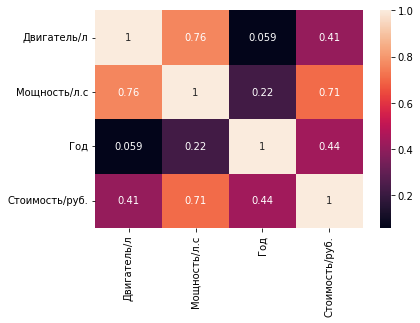

In [197]:
sns.heatmap(df_2.corr(),annot=True)

__Находим сильную корреляцию в признаках__

In [198]:
df_2.corr()[(df_2.corr() > 0.5) & (df_2.corr() != 1)].max()

Двигатель/л       0.763703
Мощность/л.с      0.763703
Год                    NaN
Стоимость/руб.    0.709370
dtype: float64

## Вывод: Можно сказать,что линейная зависимость присудствует между признаками Двигатель/л и Мощность/л.с и между Мощность/л.с и Стоимость/руб.

## График линейной зависимости между признаками Двигатель/л и Мощность/л.с

<BarContainer object of 185 artists>

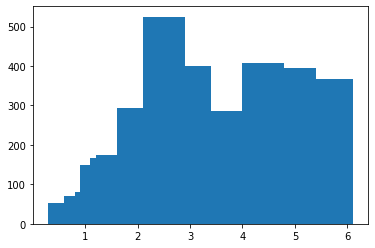

In [199]:
plt.bar(df_2['Двигатель/л'],df_2['Мощность/л.с'])

## Вывод в том,что чем больше литров вмещает,то это не показатель высокой мощности автомобиля.Самый высокий показатель у двигателя с объемом 2-2.8.

## График линейной зависимости между признаками Стоимость/руб. и Мощность/л.с

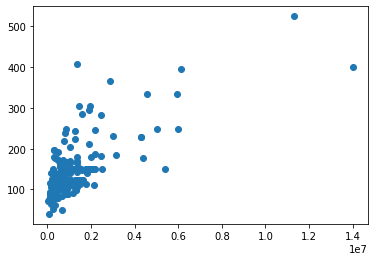

In [200]:
plt.scatter(df_2['Стоимость/руб.'],df_2['Мощность/л.с'])

## Вывод в том,что чем больше стоимость,тем выше мощность двигателя.

# Работа с выбросами

In [201]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Название автомобиля  185 non-null    object 
 1   Двигатель/л          185 non-null    float64
 2   Мощность/л.с         185 non-null    int64  
 3   Коробка передач      185 non-null    object 
 4   Привод               185 non-null    object 
 5   Цвет                 185 non-null    object 
 6   Год                  185 non-null    int64  
 7   Стоимость/руб.       185 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 11.7+ KB


__Строим боксплот для нахождения выбросов__

Границы выбрасов: [18.5, -9.5]
AxesSubplot(0.125,0.125;0.775x0.755)


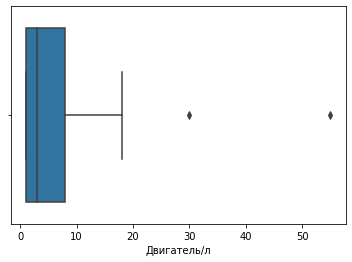

Границы выбрасов: [3.5, -0.5]
AxesSubplot(0.125,0.125;0.775x0.755)


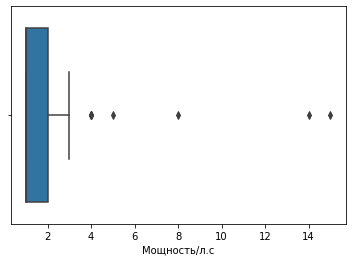

Границы выбрасов: [1.0, 1.0]
AxesSubplot(0.125,0.125;0.775x0.755)


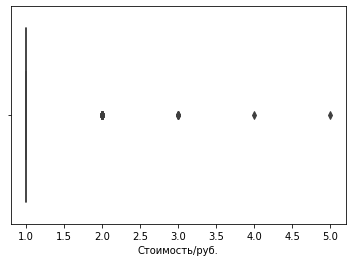

In [202]:
for i in df_2.columns:
    if i == 'Двигатель/л' or i == 'Мощность/л.с' or i == 'Стоимость/руб.':
        q1 = df_2[i].value_counts().quantile(0.25)
        q3 = df_2[i].value_counts().quantile(0.75)
        IQR = q3 - q1
        maximum = q3+(1.5*IQR)
        minimum = q1-(1.5*IQR)
        print('Границы выбрасов:', str([maximum, minimum]))
        print(sns.boxplot(df_2[i].value_counts()))
        plt.show()

## Выбор модели для обучения

In [203]:
df_2 = pd.get_dummies(df_2,columns=['Коробка передач','Цвет','Привод'])
df_2 = df_2.iloc[:,1:]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Двигатель/л               185 non-null    float64
 1   Мощность/л.с              185 non-null    int64  
 2   Год                       185 non-null    int64  
 3   Стоимость/руб.            185 non-null    int64  
 4   Коробка передач_автомат   185 non-null    uint8  
 5   Коробка передач_вариатор  185 non-null    uint8  
 6   Коробка передач_механика  185 non-null    uint8  
 7   Коробка передач_робот     185 non-null    uint8  
 8   Цвет_бежевый              185 non-null    uint8  
 9   Цвет_белый                185 non-null    uint8  
 10  Цвет_бордовый             185 non-null    uint8  
 11  Цвет_голубой              185 non-null    uint8  
 12  Цвет_желтый               185 non-null    uint8  
 13  Цвет_золотистый           185 non-null    uint8  
 14  Цвет_корич

__Данные готовы для предсказания__

## Поиск подходящей модели для этого

## Как мы видем наша задача обучить модель работать с предсказанием цены,а следовательно это задача связанная с регрессией.

__Линейная регрессия__

In [218]:
X = df_2.drop('Стоимость/руб.', axis=1)
y = df_2['Стоимость/руб.']
LinearRegression_1 = LinearRegression()
xtrain, xtest, ytrain, ytest = train_test_split(X, y)

In [219]:
LinearRegression_1.fit(xtrain, ytrain)
np.random.seed(42)
ypred = LinearRegression_1.predict(xtest)

In [220]:
print(mean_absolute_percentage_error(ytest, ypred), '%')

0.5782041980774537 %


__Рендомфорест__

In [221]:
RandomForestRegressor1 = RandomForestRegressor(random_state=42,max_depth=5,n_estimators=300)

In [222]:
RandomForestRegressor1.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=5, n_estimators=300, random_state=42)

In [223]:
ypred_random = RandomForestRegressor1.predict(xtest)
print(mean_absolute_percentage_error(ytest, ypred_random), '%')

0.2859690296214731 %


__Градиентный бустинг__

In [224]:
GradientBoostingRegressor1 = GradientBoostingRegressor(
    n_estimators=300, random_state=42)

In [225]:
GradientBoostingRegressor1.fit(xtrain, ytrain)

GradientBoostingRegressor(n_estimators=300, random_state=42)

In [226]:
ypred_grad = GradientBoostingRegressor1.predict(xtest)

In [227]:
print(mean_absolute_percentage_error(ytest, ypred_grad), '%')

0.2822000747094063 %


## Stacking модели: 

In [237]:
estimators=[('lr',LinearRegression()),('rf',RandomForestRegressor(random_state=42,max_depth=5,n_estimators=300))]
StackingRegressor_1 = StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor(
    n_estimators=300, random_state=42))

In [238]:
StackingRegressor_1.fit(xtrain, ytrain)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=5,
                                                     n_estimators=300,
                                                     random_state=42))],
                  final_estimator=GradientBoostingRegressor(n_estimators=300,
                                                            random_state=42))

In [240]:
ypred = StackingRegressor_1.predict(xtest)
print(mean_absolute_percentage_error(ytest, ypred), '%')

0.37292516698975453 %


In [245]:
estimators=[('lr',LinearRegression()),('rf',RandomForestRegressor(random_state=42,max_depth=5,n_estimators=200))]
StackingRegressor_2 = StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor(
    n_estimators=200, random_state=42))

In [247]:
StackingRegressor_2.fit(xtrain, ytrain)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=5,
                                                     n_estimators=200,
                                                     random_state=42))],
                  final_estimator=GradientBoostingRegressor(n_estimators=200,
                                                            random_state=42))

In [248]:
ypred = StackingRegressor_2.predict(xtest)
print(mean_absolute_percentage_error(ytest, ypred), '%')

0.3518492513342312 %


In [249]:
estimators=[('lr',LinearRegression()),('rf',RandomForestRegressor(random_state=42,max_depth=5,n_estimators=100))]
StackingRegressor_3 = StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor(
    n_estimators=100, random_state=42))

In [250]:
StackingRegressor_3.fit(xtrain, ytrain)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=5,
                                                     random_state=42))],
                  final_estimator=GradientBoostingRegressor(random_state=42))

In [251]:
ypred = StackingRegressor_3.predict(xtest)
print(mean_absolute_percentage_error(ytest, ypred), '%')

0.336607606123087 %


In [252]:
estimators=[('lr',LinearRegression()),('rf',RandomForestRegressor(random_state=42,max_depth=5,n_estimators=50))]
StackingRegressor_4 = StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor(
    n_estimators=50, random_state=42))

In [253]:
StackingRegressor_4.fit(xtrain, ytrain)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=5,
                                                     n_estimators=50,
                                                     random_state=42))],
                  final_estimator=GradientBoostingRegressor(n_estimators=50,
                                                            random_state=42))

In [254]:
ypred = StackingRegressor_4.predict(xtest)
print(mean_absolute_percentage_error(ytest, ypred), '%')

0.3498835391387508 %


In [256]:
estimators=[('lr',LinearRegression()),('gb',GradientBoostingRegressor(
    n_estimators=300, random_state=42))]
StackingRegressor_5 = StackingRegressor(estimators=estimators,final_estimator=
                                        RandomForestRegressor(random_state=42,max_depth=5,n_estimators=300))

In [257]:
StackingRegressor_5.fit(xtrain, ytrain)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('gb',
                               GradientBoostingRegressor(n_estimators=300,
                                                         random_state=42))],
                  final_estimator=RandomForestRegressor(max_depth=5,
                                                        n_estimators=300,
                                                        random_state=42))

In [258]:
ypred = StackingRegressor_5.predict(xtest)
print(mean_absolute_percentage_error(ytest, ypred), '%')

0.36985600620681636 %


In [259]:
estimators=[('lr',LinearRegression()),('gb',GradientBoostingRegressor(
    n_estimators=200, random_state=42))]
StackingRegressor_6 = StackingRegressor(estimators=estimators,final_estimator=
                                        RandomForestRegressor(random_state=42,max_depth=5,n_estimators=200))

In [260]:
StackingRegressor_6.fit(xtrain, ytrain)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('gb',
                               GradientBoostingRegressor(n_estimators=200,
                                                         random_state=42))],
                  final_estimator=RandomForestRegressor(max_depth=5,
                                                        n_estimators=200,
                                                        random_state=42))

In [261]:
ypred = StackingRegressor_6.predict(xtest)
print(mean_absolute_percentage_error(ytest, ypred), '%')

0.33896643638064894 %


In [265]:
estimators=[('lr',LinearRegression()),('gb',GradientBoostingRegressor(
    n_estimators=150, random_state=42))]
StackingRegressor_7 = StackingRegressor(estimators=estimators,final_estimator=
                                        RandomForestRegressor(random_state=42,max_depth=5,n_estimators=150))

In [266]:
StackingRegressor_7.fit(xtrain, ytrain)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('gb',
                               GradientBoostingRegressor(n_estimators=150,
                                                         random_state=42))],
                  final_estimator=RandomForestRegressor(max_depth=5,
                                                        n_estimators=150,
                                                        random_state=42))

In [267]:
ypred = StackingRegressor_7.predict(xtest)
print(mean_absolute_percentage_error(ytest, ypred), '%')

0.34276122808536075 %


In [268]:
estimators=[('rf',RandomForestRegressor(random_state=42,max_depth=5,n_estimators=300)),('gb',GradientBoostingRegressor(
    n_estimators=300, random_state=42))]
StackingRegressor_8 = StackingRegressor(estimators=estimators,final_estimator=
                                        LinearRegression())

In [269]:
StackingRegressor_8.fit(xtrain, ytrain)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=5,
                                                     n_estimators=300,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(n_estimators=300,
                                                         random_state=42))],
                  final_estimator=LinearRegression())

In [270]:
ypred = StackingRegressor_8.predict(xtest)
print(mean_absolute_percentage_error(ytest, ypred), '%')

0.26753014636991357 %


In [271]:
estimators=[('rf',RandomForestRegressor(random_state=42,max_depth=5,n_estimators=200)),('gb',GradientBoostingRegressor(
    n_estimators=200, random_state=42))]
StackingRegressor_9 = StackingRegressor(estimators=estimators,final_estimator=
                                        LinearRegression())

In [272]:
StackingRegressor_9.fit(xtrain, ytrain)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=5,
                                                     n_estimators=200,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(n_estimators=200,
                                                         random_state=42))],
                  final_estimator=LinearRegression())

In [273]:
ypred = StackingRegressor_9.predict(xtest)
print(mean_absolute_percentage_error(ytest, ypred), '%')

0.2709811380955033 %


## Вывод StackingRegressor_8 показало высокий результат.